# Activity 2
### Universitat Rovira i Virgili
### Neural And Evolutionary Computation

In [1]:
%load_ext autoreload
%autoreload 2
    
# Libraries
import random
import networkx as nx
import os
import matplotlib.pyplot as plt
import itertools
import pandas as pd

from GeneticAlgorithm import GeneticAlgorithm
from SimulatedAnnealing import SimulatedAnnealing

# Color Instances
### The following color instances were chosen for this Activity 2

They can be found in the following link [COLOR INSTANCES](https://mat.tepper.cmu.edu/COLOR/instances.html).
Each instance has the following structure:

NAME.col (NODES, EDGES), optimal_colouring, resource
* myciel3.col (11,20), 4, MYC
* myciel5.col (47,236), 6, MYC
* le450_5d.col (450,9757), 5, LEI


In [3]:
import itertools

FILENAME = 'myciel3.col'

configuration = {
    'NUM_COLORS': [4, 5],
    'POPULATION_SIZE': [100, 200],
    'GENERATIONS': [500, 1000],
    'MUTATION_RATE': [0.05, 0.06],
    'ELITISM_SIZE': [3, 6],
    'TOURNAMENT_SIZE': [3, 6],
    'SELECTION_METHOD': ['roulette', 'rank', 'sus', 'tournament'],
    'CROSSOVER_METHOD': ['two_point', 'uniform'],
    'MUTATE_METHOD': ['one', 'independent']
}

# Extract keys and values to maintain order
keys = configuration.keys()
values = configuration.values()

csv = []
columns = ['Configuration', 'time', 'num_colors', 'conflicts', 'generation', 'geneations_conflicts', 'best']

# itertools.product(*values) creates every combination
for combination in itertools.product(*values):
    # Create a dictionary for the current run
    params = dict(zip(keys, combination))
    
    print(f"Running with: {params}")
    
    # Initialize and run your algorithm using dictionary unpacking (**)
    # Note: Make sure your __init__ accepts these exact argument names
    problem = GeneticAlgorithm(
        FILENAME,
        **params  # This passes the dictionary keys as arguments automatically
    )
    
    # Execute the algorithm
    results = problem.genetic_algorithm()
    csv.append(results)
    
    # You should probably save the 'results' to a list or file here 
    # so you can compare them later!

Running with: {'NUM_COLORS': 4, 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'roulette', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'one'}
Valid coloring found at generation 0
Gen 0: best conflicts = 0
Best coloring found:
[1, 2, 3, 0, 2, 3, 2, 0, 3, 2, 1]
Conflicts: 0
Number of Colors {0, 1, 2, 3}
The program took 0 seconds to run.
Running with: {'NUM_COLORS': 4, 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'roulette', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'independent'}
Valid coloring found at generation 0
Gen 0: best conflicts = 0
Best coloring found:
[0, 3, 0, 1, 2, 0, 1, 1, 3, 3, 2]
Conflicts: 0
Number of Colors {0, 1, 2, 3}
The program took 0 seconds to run.
Running with: {'NUM_COLORS': 4, 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'S

In [4]:
df = pd.DataFrame(csv, columns=columns)
df.to_csv('genetic_algorithm_results_problem_1.csv', index=False)

In [5]:
df

,Configuration,time,num_colors,conflicts,generation,geneations_conflicts,best
0,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.002100,4,0,0,"[[0, 0]]","[1, 2, 3, 0, 2, 3, 2, 0, 3, 2, 1]"
1,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.001895,4,0,0,"[[0, 0]]","[0, 3, 0, 1, 2, 0, 1, 1, 3, 3, 2]"
2,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.002834,4,0,1,"[[0, 1], [1, 0]]","[0, 3, 1, 2, 3, 1, 3, 1, 1, 0, 2]"
3,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.001627,4,0,0,"[[0, 0]]","[1, 0, 3, 3, 1, 2, 2, 3, 3, 2, 1]"
4,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.002206,4,0,0,"[[0, 0]]","[2, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3]"
...,...,...,...,...,...,...,...
1019,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.004799,5,0,0,"[[0, 0]]","[3, 4, 1, 1, 3, 3, 0, 0, 4, 0, 1]"
1020,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.003093,5,0,0,"[[0, 0]]","[1, 4, 2, 2, 1, 1, 4, 0, 3, 0, 2]"
1021,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.002886,5,0,0,"[[0, 0]]","[1, 0, 3, 3, 0, 4, 4, 4, 2, 2, 3]"
1022,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.002793,5,0,0,"[[0, 0]]","[2, 1, 3, 0, 2, 2, 0, 0, 0, 2, 4]"


In [6]:
top_3 = df.sort_values(
    by=['num_colors', 'generation', 'time'], 
    ascending=[True, True, True]
).head(3)

top_3

,Configuration,time,num_colors,conflicts,generation,geneations_conflicts,best
207,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.001129,4,0,0,"[[0, 0]]","[2, 0, 2, 1, 0, 3, 0, 1, 1, 3, 2]"
47,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.001131,4,0,0,"[[0, 0]]","[3, 2, 0, 2, 3, 1, 1, 1, 0, 1, 2]"
46,"{'filename': 'myciel3.col', 'POPULATION_SIZE':...",0.001139,4,0,0,"[[0, 0]]","[2, 3, 2, 1, 0, 0, 3, 1, 3, 3, 2]"


In [9]:
geneations_conflicts = top_3[['geneations_conflicts']]
list_geneations_conflicts = geneations_conflicts['geneations_conflicts'].to_list()

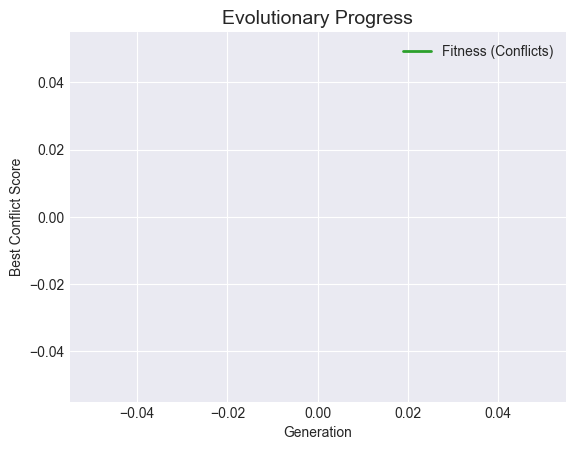

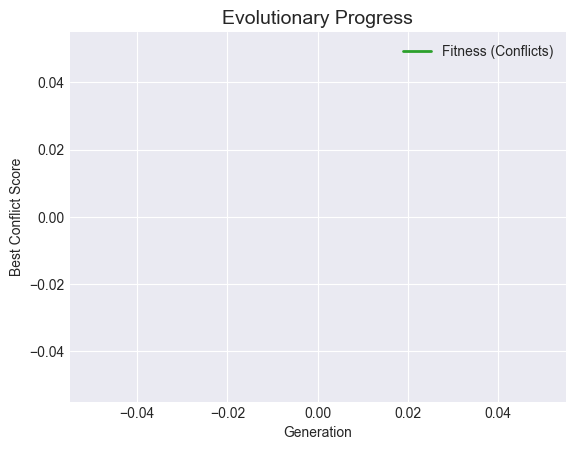

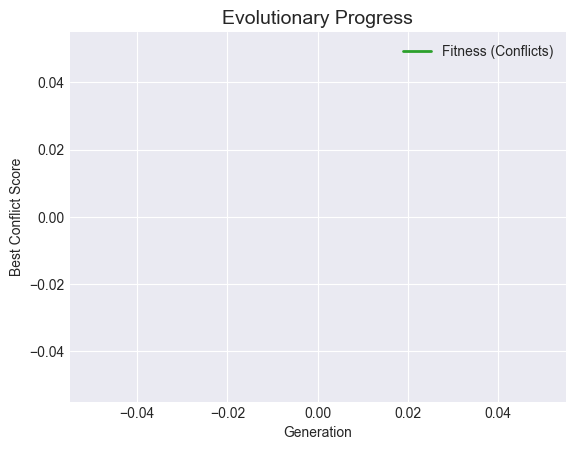

In [10]:
for i in list_geneations_conflicts:
    problem.generations_conflicts = i
    problem.plot_conflicts()

In [8]:
best = top_3[['best']]
list_best = best['best'].to_list()
configuration = top_3[['Configuration']]
list_configuration = configuration['Configuration'].to_list()

Configuration  {'filename': 'myciel3.col', 'POPULATION_SIZE': 100, 'GENERATIONS': 1000, 'MUTATION_RATE': 0.06, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'independent'}


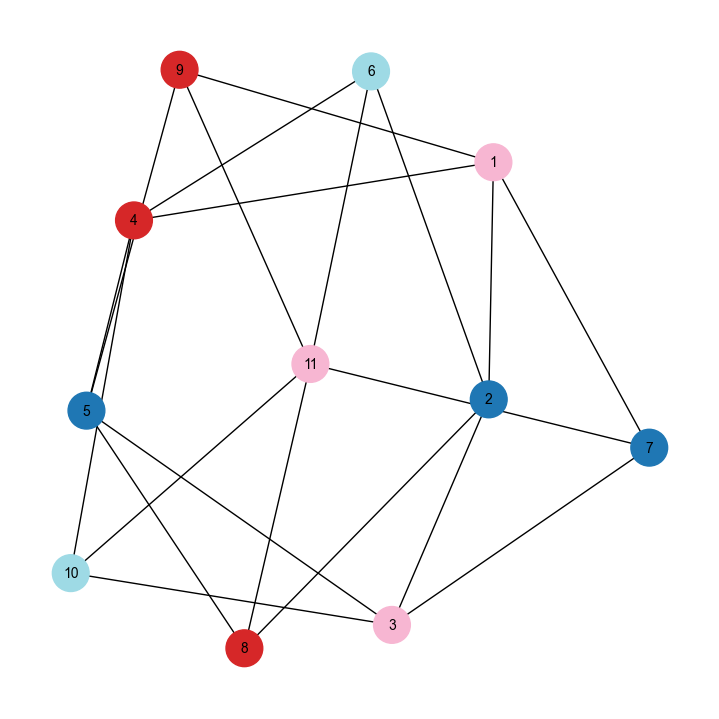

Configuration  {'filename': 'myciel3.col', 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 6, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'independent'}


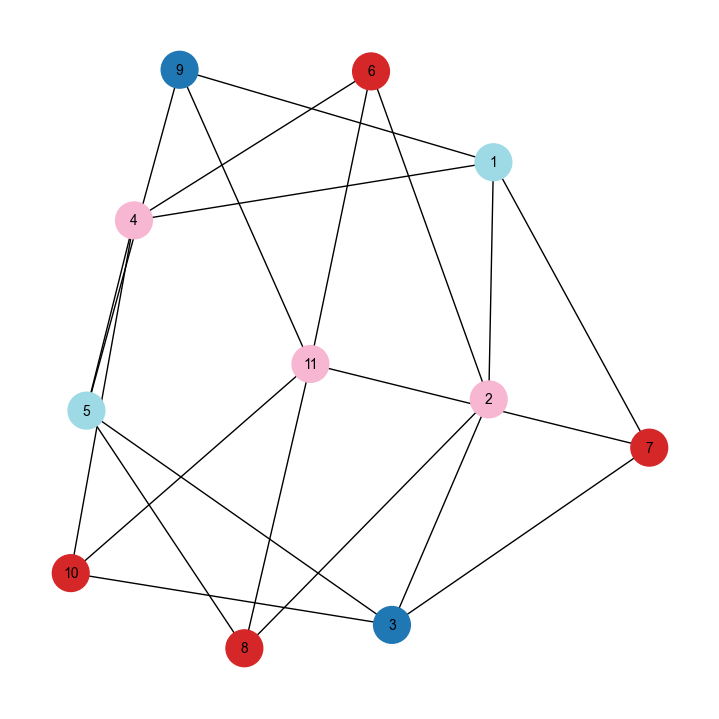

Configuration  {'filename': 'myciel3.col', 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 6, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'one'}


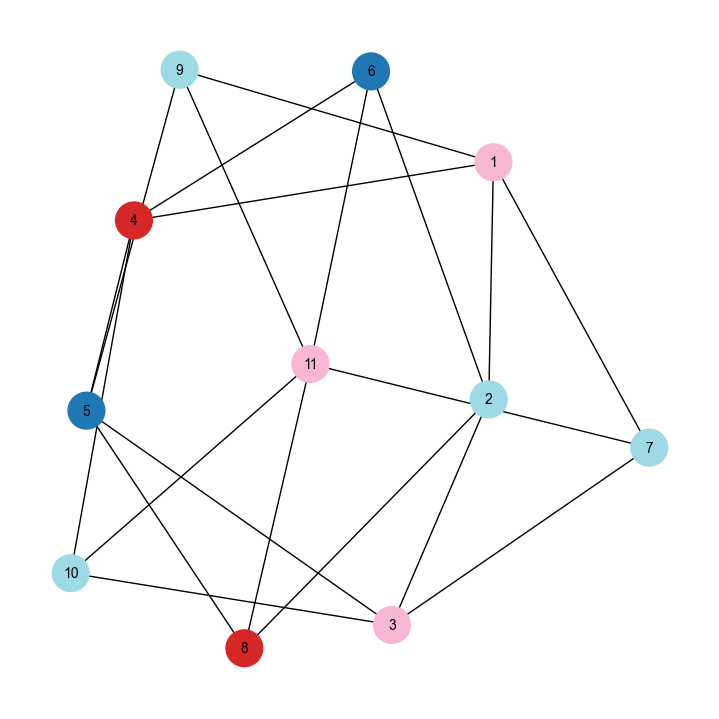

In [11]:
for i in range(len(list_configuration)):
    G = problem.build_nx_graph()
    print('Configuration ' , list_configuration[i])
    problem.draw_colored_graph(G, list_best[i])

In [57]:
FILENAME = 'myciel5.col'

configuration = {
    'NUM_COLORS': [6, 7],
    'POPULATION_SIZE': [100, 200],
    'GENERATIONS': [500, 1000],
    'MUTATION_RATE': [0.05, 0.06],
    'ELITISM_SIZE': [3, 6],
    'TOURNAMENT_SIZE': [3, 6],
    'SELECTION_METHOD': ['roulette', 'rank', 'sus', 'tournament'],
    'CROSSOVER_METHOD': ['two_point', 'uniform'],
    'MUTATE_METHOD': ['one', 'independent']
}

# Extract keys and values to maintain order
keys = configuration.keys()
values = configuration.values()

csv = []
columns = ['Configuration', 'time', 'num_colors', 'conflicts', 'generation', 'geneations_conflicts', 'best']

# itertools.product(*values) creates every combination
for combination in itertools.product(*values):
    # Create a dictionary for the current run
    params = dict(zip(keys, combination))
    
    print(f"Running with: {params}")
    
    # Initialize and run your algorithm using dictionary unpacking (**)
    # Note: Make sure your __init__ accepts these exact argument names
    problem = GeneticAlgorithm(
        FILENAME,
        **params  # This passes the dictionary keys as arguments automatically
    )
    
    # Execute the algorithm
    results = problem.genetic_algorithm()
    csv.append(results)
    
    # You should probably save the 'results' to a list or file here 
    # so you can compare them later!

Running with: {'NUM_COLORS': 6, 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'roulette', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'one'}
Gen 0: best conflicts = 22
Gen 50: best conflicts = 2
Valid coloring found at generation 69
Gen 69: best conflicts = 0
Best coloring found:
[3, 0, 5, 1, 0, 3, 1, 5, 1, 3, 0, 4, 4, 4, 4, 4, 3, 1, 3, 4, 4, 4, 0, 2, 1, 5, 5, 2, 5, 1, 2, 1, 3, 2, 2, 2, 5, 1, 3, 2, 2, 4, 1, 3, 2, 2, 0]
Conflicts: 0
Number of Colors {0, 1, 2, 3, 4, 5}
The program took 0 seconds to run.
Running with: {'NUM_COLORS': 6, 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 3, 'SELECTION_METHOD': 'roulette', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'independent'}
Gen 0: best conflicts = 21
Gen 50: best conflicts = 7
Gen 100: best conflicts = 4
Gen 150: best conflicts = 3
Gen 200: best conflicts = 2
Gen 250: best conflicts = 1
Ge

In [65]:
df = pd.DataFrame(csv, columns=columns)
df.to_csv('genetic_algorithm_results_problem_2.csv', index=False)

In [66]:
df

,Configuration,time,num_colors,conflicts,generation,geneations_conflicts,best
0,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.217588,6,0,69,"[[0, 22], [1, 22], [2, 22], [3, 22], [4, 20], ...","[3, 0, 5, 1, 0, 3, 1, 5, 1, 3, 0, 4, 4, 4, 4, ..."
1,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.953576,6,0,312,"[[0, 21], [1, 20], [2, 19], [3, 19], [4, 19], ...","[4, 1, 0, 1, 4, 0, 3, 0, 2, 3, 4, 5, 2, 2, 2, ..."
2,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.519573,6,0,187,"[[0, 22], [1, 22], [2, 22], [3, 22], [4, 22], ...","[0, 5, 2, 4, 0, 2, 4, 4, 4, 0, 5, 0, 5, 1, 4, ..."
3,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.727215,6,0,236,"[[0, 23], [1, 23], [2, 23], [3, 23], [4, 22], ...","[1, 5, 0, 0, 5, 2, 2, 1, 2, 1, 5, 3, 3, 3, 3, ..."
4,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.1206,6,0,37,"[[0, 24], [1, 21], [2, 18], [3, 18], [4, 15], ...","[5, 4, 0, 4, 3, 3, 2, 0, 2, 3, 5, 5, 4, 1, 4, ..."
...,...,...,...,...,...,...,...
1019,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",2.006449,7,0,241,"[[0, 16], [1, 16], [2, 16], [3, 16], [4, 16], ...","[3, 6, 1, 1, 0, 5, 5, 4, 5, 5, 1, 3, 2, 4, 1, ..."
1020,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.264231,7,0,20,"[[0, 18], [1, 15], [2, 13], [3, 11], [4, 10], ...","[1, 5, 6, 6, 4, 0, 4, 0, 5, 1, 2, 2, 4, 2, 2, ..."
1021,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.333052,7,0,21,"[[0, 19], [1, 18], [2, 14], [3, 14], [4, 11], ...","[3, 0, 5, 5, 3, 1, 0, 4, 1, 0, 5, 3, 0, 4, 4, ..."
1022,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.209902,7,0,15,"[[0, 20], [1, 18], [2, 14], [3, 14], [4, 14], ...","[1, 5, 2, 0, 1, 2, 3, 2, 3, 5, 1, 4, 6, 4, 3, ..."


In [67]:
top_3 = df.sort_values(
    by=['num_colors', 'generation', 'time'], 
    ascending=[True, True, True]
).head(3)

top_3

,Configuration,time,num_colors,conflicts,generation,geneations_conflicts,best
446,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.183613,6,0,13,"[[0, 15], [1, 15], [2, 15], [3, 14], [4, 10], ...","[4, 2, 3, 2, 4, 3, 2, 3, 3, 5, 1, 4, 2, 0, 2, ..."
124,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.120429,6,0,17,"[[0, 19], [1, 19], [2, 16], [3, 13], [4, 13], ...","[4, 0, 4, 3, 2, 4, 1, 4, 0, 0, 2, 4, 0, 4, 3, ..."
30,"{'filename': 'myciel5.col', 'POPULATION_SIZE':...",0.121996,6,0,17,"[[0, 22], [1, 20], [2, 20], [3, 16], [4, 13], ...","[1, 2, 4, 3, 5, 4, 2, 4, 4, 1, 5, 5, 5, 3, 3, ..."


In [73]:
geneations_conflicts = top_3[['geneations_conflicts']]
list_geneations_conflicts = geneations_conflicts['geneations_conflicts'].to_list()

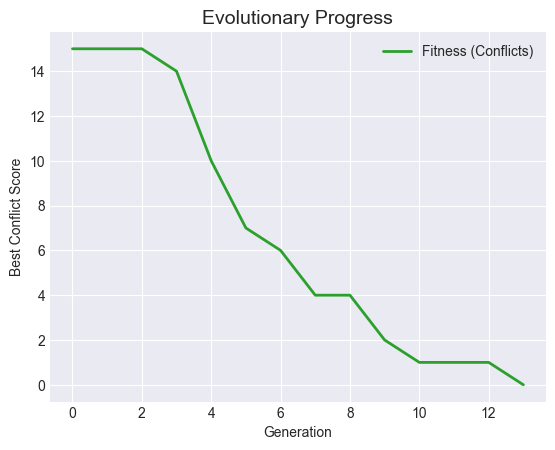

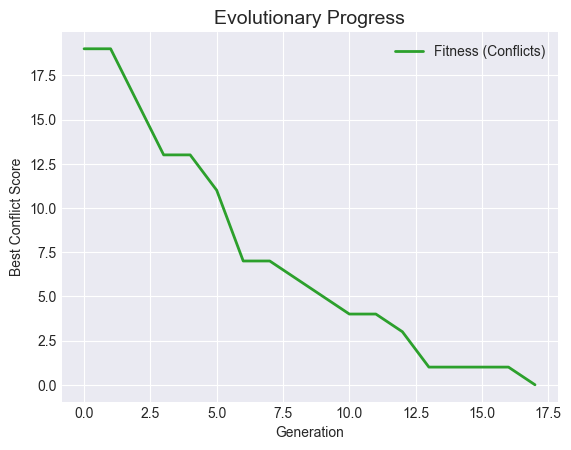

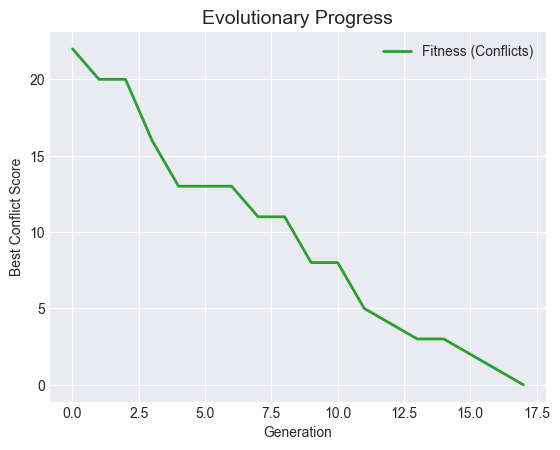

In [74]:
for i in list_geneations_conflicts:
    problem.generations_conflicts = i
    problem.plot_conflicts()

In [71]:
best = top_3[['best']]
list_best = best['best'].to_list()
configuration = top_3[['Configuration']]
list_configuration = configuration['Configuration'].to_list()

Configuration  {'filename': 'myciel5.col', 'POPULATION_SIZE': 200, 'GENERATIONS': 1000, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 6, 'TOURNAMENT_SIZE': 6, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'one'}


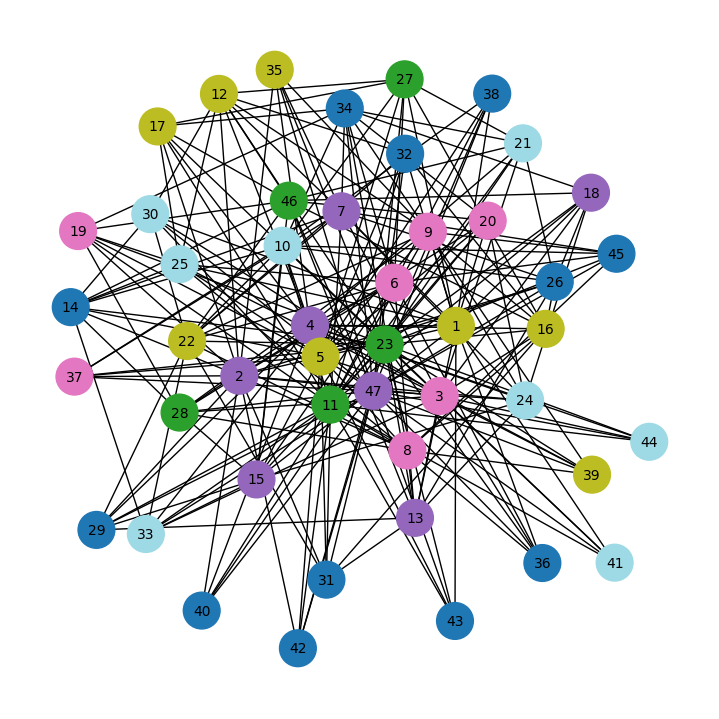

Configuration  {'filename': 'myciel5.col', 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.06, 'ELITISM_SIZE': 6, 'TOURNAMENT_SIZE': 6, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'one'}


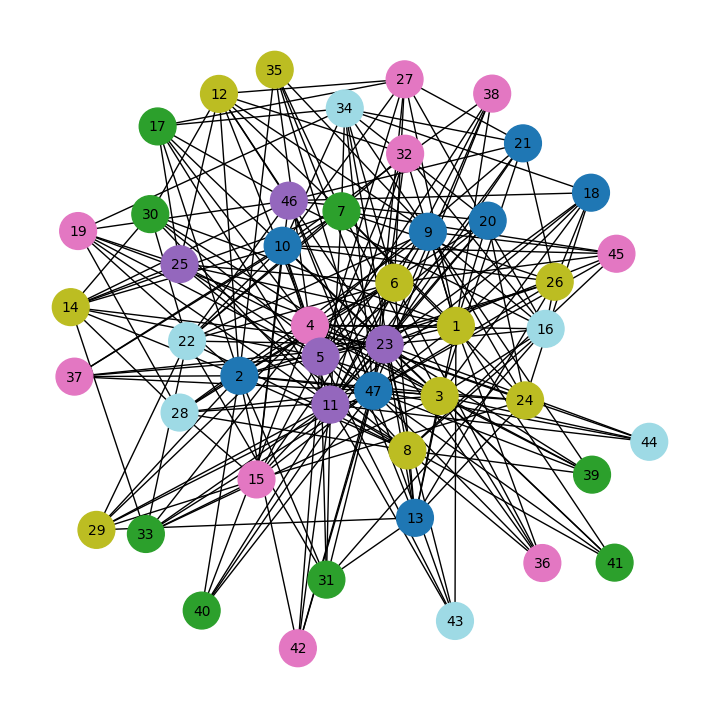

Configuration  {'filename': 'myciel5.col', 'POPULATION_SIZE': 100, 'GENERATIONS': 500, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 6, 'SELECTION_METHOD': 'tournament', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'one'}


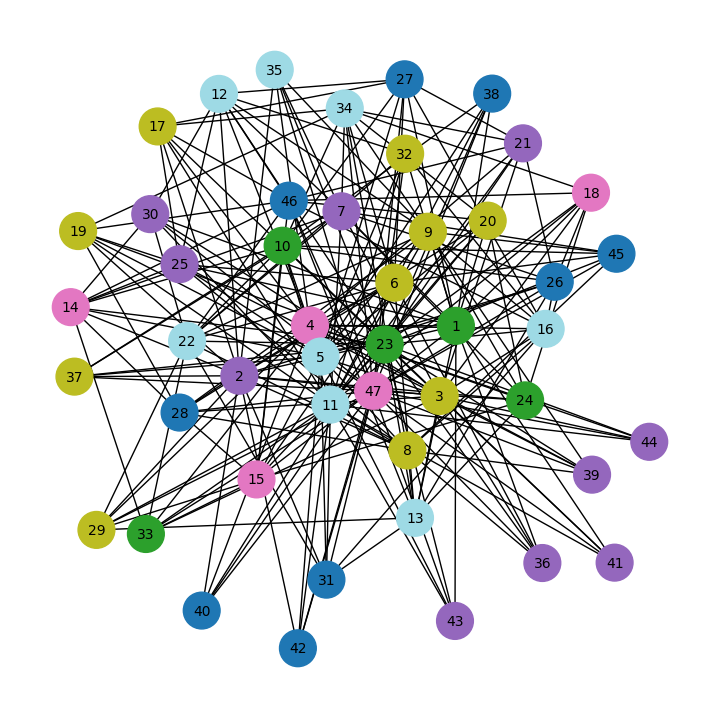

In [72]:
for i in range(len(list_configuration)):
    G = problem.build_nx_graph()
    print('Configuration ' , list_configuration[i])
    problem.draw_colored_graph(G, list_best[i])

In [33]:
FILENAME = 'homer.col'

configuration = {
    'NUM_COLORS': [13, 14],
    'POPULATION_SIZE': [300, 400],
    'GENERATIONS': [3000],
    'MUTATION_RATE': [0.05, 0.06],
    'ELITISM_SIZE': [3, 5],
    'TOURNAMENT_SIZE': [4],
    'SELECTION_METHOD': ['roulette', 'rank', 'sus', 'tournament'],
    'CROSSOVER_METHOD': ['two_point', 'uniform'],
    'MUTATE_METHOD': ['one', 'independent'],
    'STOP_AUTOMATICALLY': [True],
}

# Extract keys and values to maintain order
keys = configuration.keys()
values = configuration.values()

csv = []
columns = ['Configuration', 'time', 'num_colors', 'conflicts', 'generation']

# itertools.product(*values) creates every combination
for combination in itertools.product(*values):
    # Create a dictionary for the current run
    params = dict(zip(keys, combination))
    
    print(f"Running with: {params}")
    
    # Initialize and run your algorithm using dictionary unpacking (**)
    # Note: Make sure your __init__ accepts these exact argument names
    problem = GeneticAlgorithm(
        FILENAME,
        **params,  # This passes the dictionary keys as arguments automatically
    )
    
    # Execute the algorithm
    results = problem.genetic_algorithm()
    csv.append(results)
    
    # You should probably save the 'results' to a list or file here 
    # so you can compare them later!

Running with: {'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GENERATIONS': 3000, 'MUTATION_RATE': 0.05, 'ELITISM_SIZE': 3, 'TOURNAMENT_SIZE': 4, 'SELECTION_METHOD': 'roulette', 'CROSSOVER_METHOD': 'two_point', 'MUTATE_METHOD': 'one', 'STOP_AUTOMATICALLY': True}
Gen 0: best conflicts = 190
Gen 50: best conflicts = 86
Gen 100: best conflicts = 34
Gen 150: best conflicts = 16
Gen 200: best conflicts = 16
Gen 250: best conflicts = 12
Gen 300: best conflicts = 10
Gen 350: best conflicts = 10
Gen 400: best conflicts = 10
Gen 450: best conflicts = 8
Gen 500: best conflicts = 8
Gen 550: best conflicts = 8
Gen 600: best conflicts = 8
Gen 650: best conflicts = 6
Gen 700: best conflicts = 6
Gen 750: best conflicts = 6
Gen 800: best conflicts = 6
Gen 850: best conflicts = 6
Gen 900: best conflicts = 6
Gen 950: best conflicts = 6
Gen 1000: best conflicts = 6
Gen 1050: best conflicts = 6
Gen 1100: best conflicts = 6
Gen 1150: best conflicts = 6
Stop, no evolution
Running with: {'NUM_COLORS': 13, 'POPUL

KeyboardInterrupt: 

In [64]:
df = pd.DataFrame(csv, columns=columns)
df.to_csv('genetic_algorithm_results_problem_3_no_solved.csv', index=False)

In [75]:
df

,configuration,time,num_colors,conflicts,generation
0,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,6,650
1,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,66,1150
2,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,6,250
3,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,110,950
4,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,4,450
...,...,...,...,...,...
258,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,6,150
259,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,64,1050
260,"{'NUM_COLORS': 14, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,14,6,700
261,"{'NUM_COLORS': 14, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,14,60,1250


In [77]:
top_10 = df.sort_values(
    by=['num_colors', 'conflicts'], 
    ascending=[True, True]
).head(10)

top_10

,configuration,time,num_colors,conflicts,generation
58,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,2,200
76,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,450
82,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,300
98,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,350
122,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,350
190,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 300, 'GE...",NO_SOLUTION,13,2,200
208,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,450
214,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,300
230,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,350
254,"{'NUM_COLORS': 13, 'POPULATION_SIZE': 400, 'GE...",NO_SOLUTION,13,2,350


In [78]:
configuration = df_10[['Configuration']]
list_configuration = configuration['Configuration'].to_list()

In [80]:
import ast
import json

csv = []
columns = ['Configuration', 'time', 'num_colors', 'conflicts', 'generation', 'geneations_conflicts', 'best']

# itertools.product(*values) creates every combination
for configuration in list_configuration:
    data_dict = ast.literal_eval(configuration)

    # Convertimos el diccionario a un string JSON válido (con comillas dobles)
    print(f"Running with: {data_dict}")
    # Initialize and run your algorithm using dictionary unpacking (**)
    # Note: Make sure your __init__ accepts these exact argument names
    problem = GeneticAlgorithm(
        **data_dict,
        NUM_COLORS=13
        
    )
    
    # Execute the algorithm
    results = problem.genetic_algorithm()
    csv.append(results)
    
    # You should probably save the 'results' to a list or file here 
    # so you can compare them later!

Running with: {'POPULATION_SIZE': 300, 'GENERATIONS': 3000, 'MUTATION_RATE': 0.06, 'ELITISM_SIZE': 5, 'TOURNAMENT_SIZE': 4, 'SELECTION_METHOD': 'sus', 'CROSSOVER_METHOD': 'uniform', 'MUTATE_METHOD': 'one', 'filename': 'homer.col'}
Gen 0: best conflicts = 182
Gen 50: best conflicts = 134
Gen 100: best conflicts = 52
Gen 150: best conflicts = 8
Gen 200: best conflicts = 6
Gen 250: best conflicts = 4
Gen 300: best conflicts = 4
Gen 350: best conflicts = 4
Gen 400: best conflicts = 4
Gen 450: best conflicts = 4
Gen 500: best conflicts = 4
Gen 550: best conflicts = 4
Gen 600: best conflicts = 4
Gen 650: best conflicts = 4
Gen 700: best conflicts = 4
Gen 750: best conflicts = 4
Gen 800: best conflicts = 4
Gen 850: best conflicts = 4
Gen 900: best conflicts = 4
Gen 950: best conflicts = 4
Gen 1000: best conflicts = 4
Gen 1050: best conflicts = 4
Gen 1100: best conflicts = 4
Gen 1150: best conflicts = 4
Gen 1200: best conflicts = 4
Gen 1250: best conflicts = 4
Gen 1300: best conflicts = 4
Gen 

In [61]:
filename = 'homer.col'
POPULATION_SIZE = 500
GENERATIONS = 10000
MUTATION_RATE = 0.06
ELITISM_SIZE = 5
TOURNAMENT_SIZE = 4
CROSSOVER_METHOD = "uniform"
NUM_COLORS = 13
SELECTION_METHOD = 'sus'
MUTATE_METHOD = 'one'


problem = GeneticAlgorithm(
    filename=filename,
    POPULATION_SIZE=POPULATION_SIZE,
    GENERATIONS=GENERATIONS,
    ELITISM_SIZE=ELITISM_SIZE,
    TOURNAMENT_SIZE=TOURNAMENT_SIZE,
    CROSSOVER_METHOD=CROSSOVER_METHOD,
    NUM_COLORS=NUM_COLORS,
    SELECTION_METHOD=SELECTION_METHOD,
    MUTATE_METHOD=MUTATE_METHOD,
)

# Execute the algorithm
results = problem.genetic_algorithm()

Gen 0: best conflicts = 198
Gen 50: best conflicts = 132
Gen 100: best conflicts = 60
Gen 150: best conflicts = 16
Gen 200: best conflicts = 6
Gen 250: best conflicts = 6
Gen 300: best conflicts = 6
Gen 350: best conflicts = 6
Gen 400: best conflicts = 6
Gen 450: best conflicts = 6
Gen 500: best conflicts = 6
Gen 550: best conflicts = 6
Gen 600: best conflicts = 6
Gen 650: best conflicts = 6
Gen 700: best conflicts = 4
Gen 750: best conflicts = 4
Gen 800: best conflicts = 4
Gen 850: best conflicts = 4
Gen 900: best conflicts = 4
Gen 950: best conflicts = 4
Gen 1000: best conflicts = 4
Gen 1050: best conflicts = 4
Gen 1100: best conflicts = 4
Gen 1150: best conflicts = 4
Gen 1200: best conflicts = 4
Gen 1250: best conflicts = 4
Gen 1300: best conflicts = 4
Gen 1350: best conflicts = 4
Gen 1400: best conflicts = 4
Gen 1450: best conflicts = 4
Gen 1500: best conflicts = 4
Gen 1550: best conflicts = 4
Gen 1600: best conflicts = 4
Gen 1650: best conflicts = 4
Gen 1700: best conflicts = 4
Ge